# This notebook will try to classify iris flowers based on the dataset iris.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris = pd.read_csv('iris.csv')

In [5]:
# Display the dataset
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
# Statistics summary of the dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# display the datatype of each column
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Display no of samples in each class
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [9]:
# get the mean of each irsis species
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### Check for Null Values

In [10]:
# check for missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Data Visualization

Scatterplot
- X Axis -> Sepal Length
- Y Axis -> Sepal Width

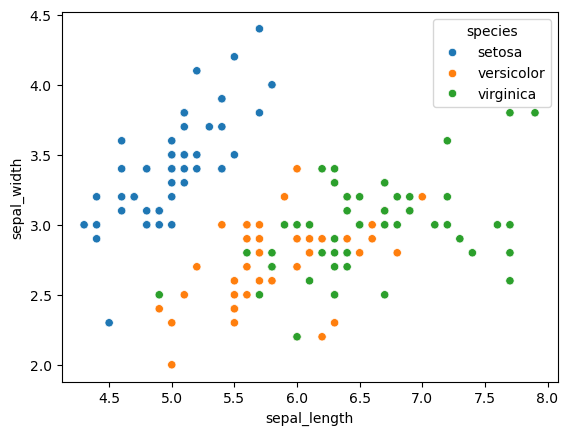

In [11]:
# Scatter plot (sepal length vs sepal width)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.show()

Scatterplot
- X Axis -> Petal Length
- Y Axis -> Petal Width

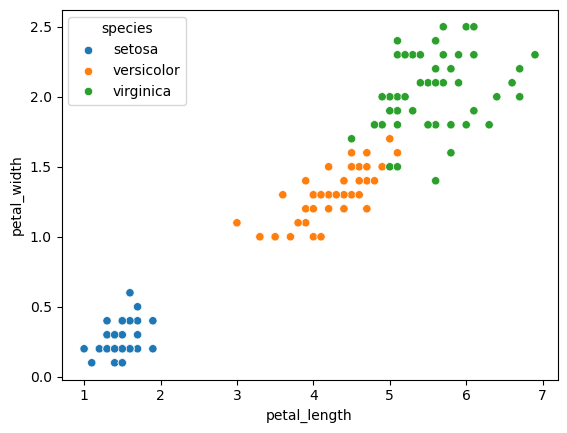

In [12]:
# Scatter plot (petal length vs petal width)
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris)
plt.show()

This shows that the setosa species could be identified by using classifier method, since the setosa plots are separated from the versicolor and virginica species quite nicely

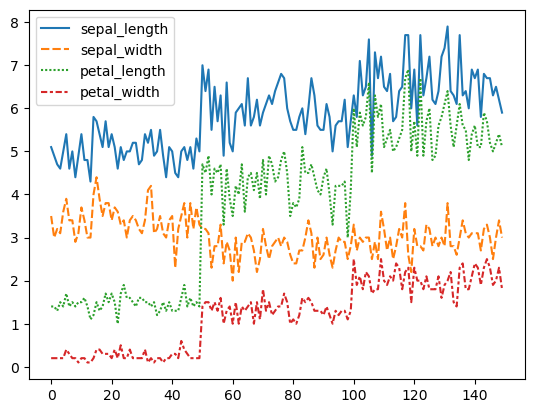

In [13]:
# Line plot
sns.lineplot(data=iris.drop(['species'], axis=1))
plt.show()

## Correlation Analysis

Correlation Matrix

In [14]:
# Show the correlation matrix
corr = iris.drop(['species'], axis=1).corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Correlation Matrix (Visualized)

<Axes: >

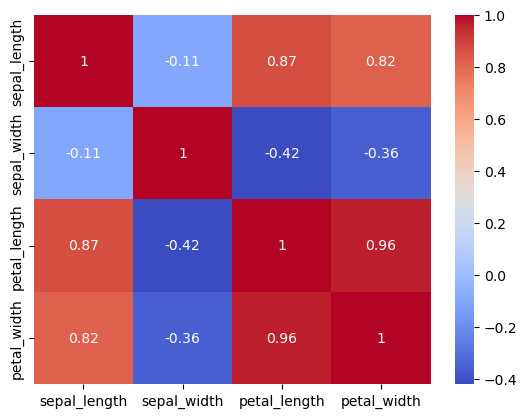

In [15]:
# Show the heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Label Encoder
To facilitate machine learning, data must be pre-proccessed to a machine readable format (numerical) here use sklearn library to convert the data to machine readable format.

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
iris['species'] = le.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training

Allocate training and test data set as follows,
- Training set -> 70% of the data
- Test set -> 30% of the data

In [58]:
from sklearn.model_selection import train_test_split

params = iris.drop(columns=['species'])
target = iris['species']
x_train, x_test, y_train, y_test = train_test_split(params, target, test_size=0.3)

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [60]:
model.fit(x_train, y_train)

LogisticRegression()

In [61]:
'''
Print the accuracy of the model
'''
print(f"Model Accuracy: {model.score(x_test, y_test) * 100:.2f}%")

Model Accuracy: 95.56%


### K-NN Model

In [62]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [63]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [64]:
'''
Print the accuracy of the model
'''
print(f"Model Accuracy: {model.score(x_test, y_test) * 100:.2f}%")

Model Accuracy: 95.56%


### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [66]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [67]:
'''
Print the accuracy of the model
'''
print(f"Model Accuracy: {model.score(x_test, y_test) * 100:.2f}%")

Model Accuracy: 97.78%
